# Regressão Linear

In [0]:
#imports
FILENAME="BlackFriday.csv"
import pandas as pd
from google.colab import files
import io
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

In [130]:
uploaded = files.upload()

Saving BlackFriday.csv to BlackFriday (4).csv


In [131]:
if not FILENAME in uploaded:
  print('o ficheiro {0} nao foi encontrado'.format(FILENAME))
  exit()
  
rawdata=uploaded['BlackFriday.csv'].decode('utf-8')
  
df=pd.read_csv(io.StringIO(rawdata))
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


### Preparar os dados

In [0]:
df.fillna(value=0,inplace=True)

In [0]:
df["Product_Category_2"] = df["Product_Category_2"].astype(int)
df["Product_Category_3"] = df["Product_Category_3"].astype(int)

In [0]:
df.drop(columns = ["User_ID","Product_ID"],inplace=True)
df.drop(columns = ["Occupation"],inplace=True)

In [0]:
#Anos a viver na cidade:
#4+ -> 4
df['Stay_In_Current_City_Years'].replace(['4+'],[4],inplace=True)

In [136]:
df.head()

,Gender,Age,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,A,2,0,3,0,0,8370
1,F,0-17,A,2,0,1,6,14,15200
2,F,0-17,A,2,0,12,0,0,1422
3,F,0-17,A,2,0,12,14,0,1057
4,M,55+,C,4,0,8,0,0,7969


### Encoding categorical data

In [0]:
df = pd.get_dummies(df, columns=['Gender','Age','City_Category'], drop_first=True)

In [138]:
df.head()

,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
0,2,0,3,0,0,8370,0,0,0,0,0,0,0,0,0
1,2,0,1,6,14,15200,0,0,0,0,0,0,0,0,0
2,2,0,12,0,0,1422,0,0,0,0,0,0,0,0,0
3,2,0,12,14,0,1057,0,0,0,0,0,0,0,0,0
4,4,0,8,0,0,7969,1,0,0,0,0,0,1,0,1


### Histogramas

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c01aee908>,
      dtype=object)

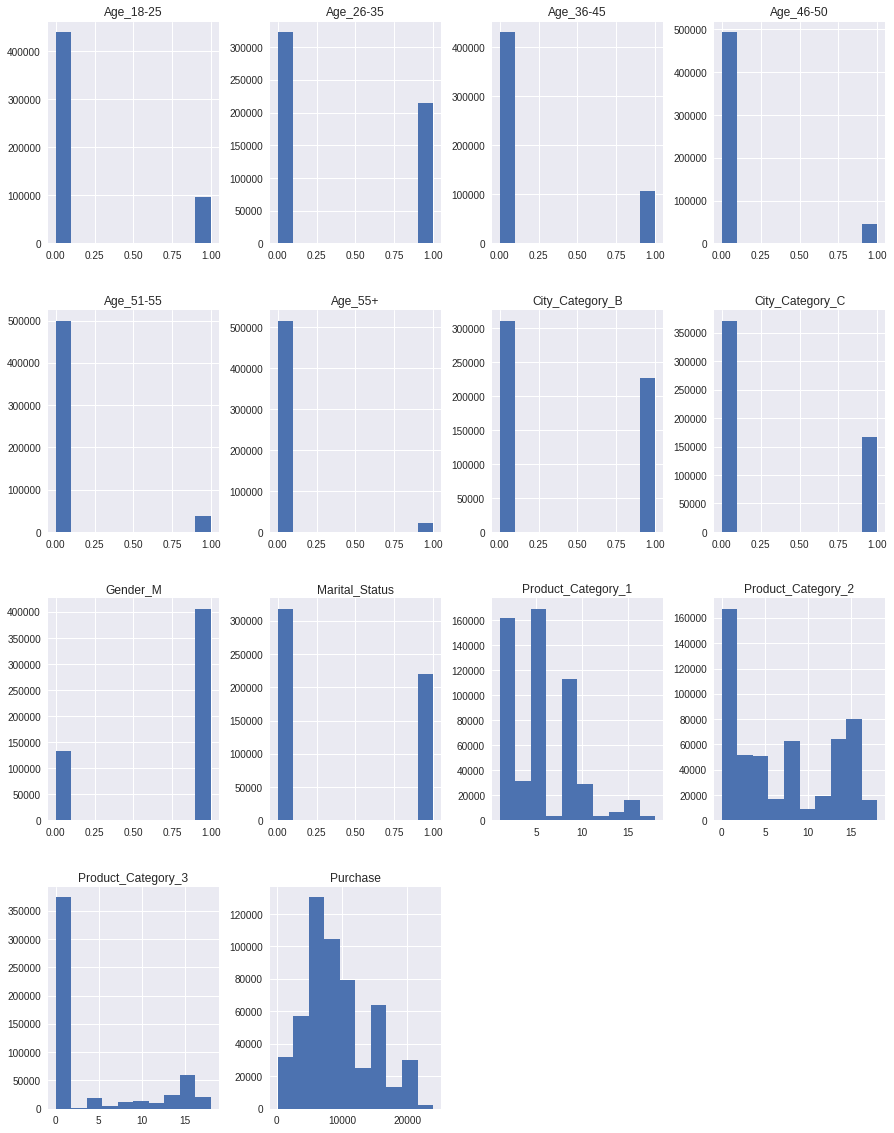

In [139]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

### Método para correlaçao das features e determinar quais vao ter mais relevancia com o purchase

Index(['Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'Gender_M',
       'Age_18-25', 'Age_26-35', 'Age_36-45', 'Age_46-50', 'Age_51-55',
       'Age_55+', 'City_Category_B', 'City_Category_C'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


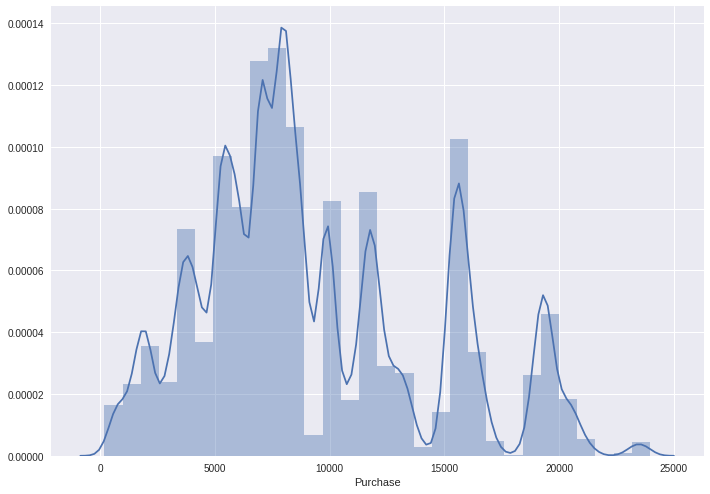

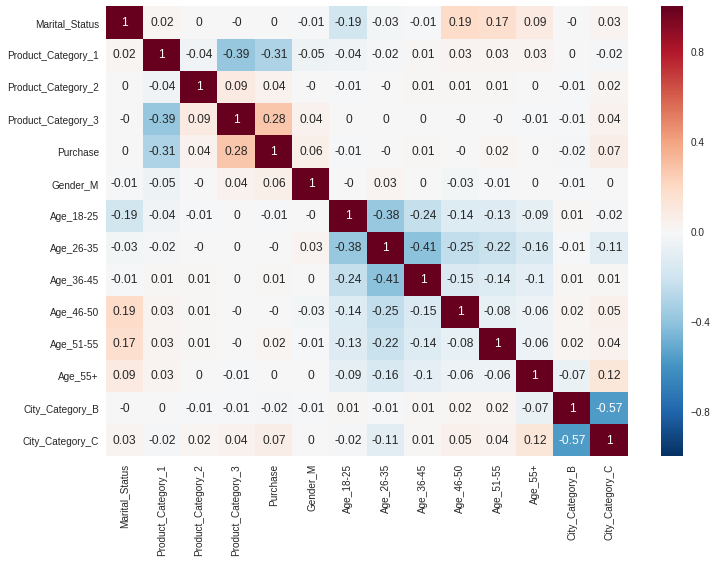

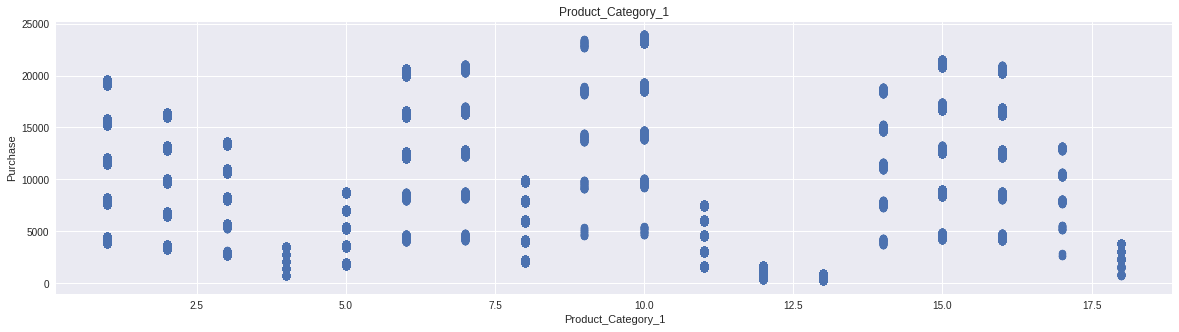

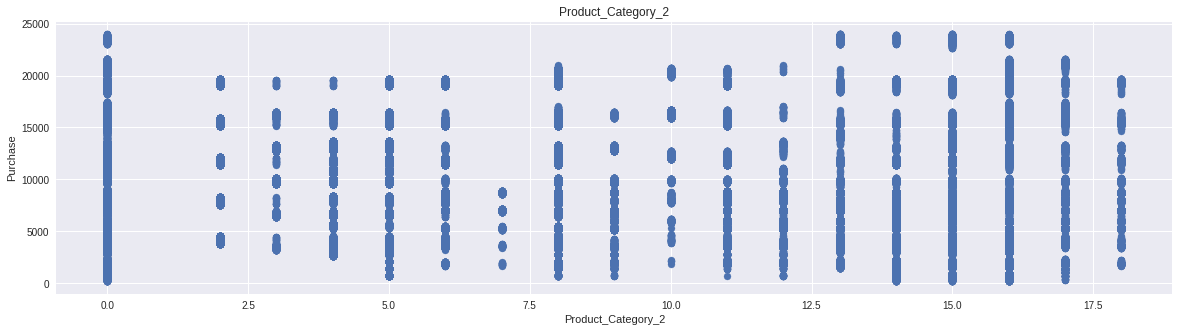

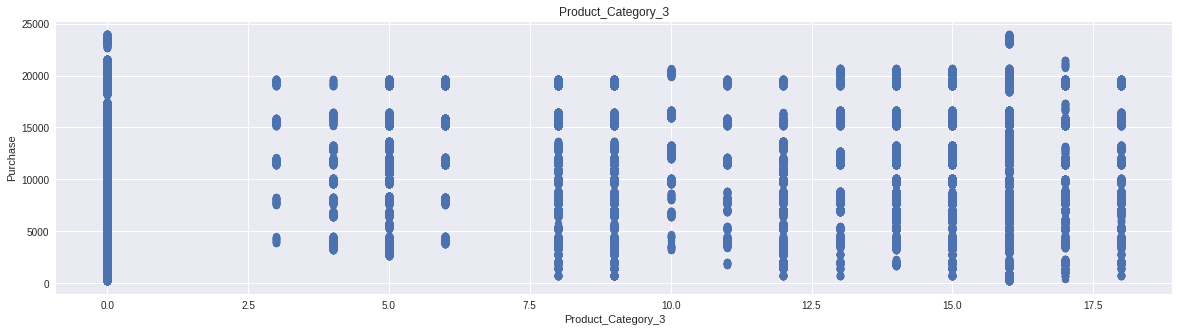

In [140]:
print(df.keys())
df.head()
df.isnull().sum()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['Purchase'], bins=30)
plt.show()

df.corr()
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

plt.figure(figsize=(20, 5))

features = ['Product_Category_1']
target = df['Purchase']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Purchase')


    plt.figure(figsize=(20, 5))
    features = ['Product_Category_2']
    target = df['Purchase']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Purchase')



    plt.figure(figsize=(20, 5))
    features = ['Product_Category_3']
    target = df['Purchase']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Purchase')

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [0]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [146]:
# Descriptive statistics for each column
df.describe()

,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_B,City_Category_C
count,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,0.408797,5.295546,6.784907,3.871773,9333.859853,0.754087,0.181619,0.399366,0.199969,0.082827,0.069977,0.038884,0.421322,0.309623
std,0.491612,3.750701,6.211618,6.265963,4981.022133,0.430627,0.385530,0.489769,0.399977,0.275621,0.255108,0.193318,0.493771,0.462338
min,0.000000,1.000000,0.000000,0.000000,185.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,5866.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.000000,5.000000,0.000000,8062.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.000000,14.000000,8.000000,12073.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,18.000000,18.000000,18.000000,23961.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Criar as variaveis y e X para a regressão

In [0]:
y = np.log(df['Purchase'])
X = df.drop('Purchase', axis=1)

### Separar os dados em train e test set

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.2, random_state=5)

In [149]:
#visualizar o tamanho de cada set
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(430061, 14)
(107516, 14)
(430061,)
(107516,)


### Linear Regression

In [0]:
#criar objecto linear regression
regressor = LinearRegression()

In [151]:
#fazer fit do objecto
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [152]:
#ver o score das variaveis de teste
regressor.score(X_test, Y_test)

0.14025821365496005

In [153]:
#fazer uma previsão
y_pred = regressor.predict(X_test)
y_pred

array([9.08712493, 8.72328443, 8.88623015, ..., 8.98429609, 9.22200325,
       8.91821974])

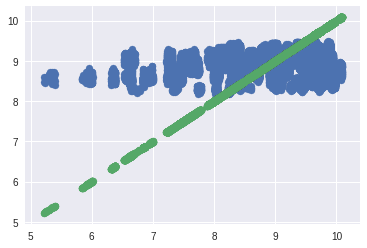

In [154]:
#gráfico que mostra a relação das variaveis de teste com as previsões, verifica-se que os dados das previsões fogem da linha das variáveis de teste
plt.scatter(x=Y_test, y=y_pred) #azul
plt.scatter(x=Y_test,y=Y_test) #verde
plt.show()

In [155]:
#calcular o RMSE para o train set

(np.mean((Y_train-regressor.predict(X_train)) ** 2))**0.5

#Esta é a importante - erro do método
np.mean(abs(Y_test-y_pred)/Y_test)

0.05039400770009882

In [156]:
from sklearn import metrics
display('RMSE: '+ str(np.sqrt(metrics.mean_squared_error(y_pred, Y_test))))

'RMSE: 0.5991419317859966'

In [0]:
# Calcular os erros absolutos
errors = abs(y_pred - Y_test)

In [158]:
# mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.43


In [0]:
# mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)

In [160]:
# Calcular e display da accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.96 %.


Text(0, 0.5, 'residual')

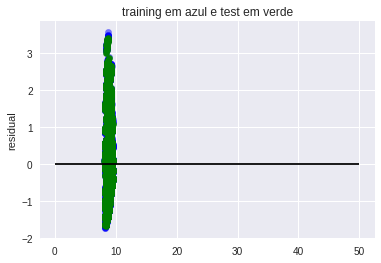

In [161]:
#visualizar os erros dos dados. Se os calculos estiverem bem feitos os dados estarão espalhados à volta
#da linha do zero. Neste gráfico verifica-se que os dados estao à volta da linha de zero.
plt.scatter(regressor.predict(X_train),regressor.predict(X_train)-Y_train,c='b',s=40,alpha=0.5)
plt.scatter(regressor.predict(X_test),regressor.predict(X_test)-Y_test,c='g',s=40)
plt.hlines(y=0,xmin=0,xmax=50)
plt.title('training em azul e test em verde')
plt.ylabel('residual')

### Só as features das categorias de produto

In [0]:
#variaveis novas - X2 e y2 - para não confundir com as variaveis X e y
y2 = np.log(df['Purchase'])

In [0]:
feature_cols=['Product_Category_1','Product_Category_2','Product_Category_3']

In [0]:
X2=df[feature_cols]

In [0]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, Y2_train, Y2_test=train_test_split(X2, y2, test_size=0.2, random_state=5)

In [166]:
#visualizar o tamanho de cada set
print(X2_train.shape)
print(X2_test.shape)
print(Y2_train.shape)
print(Y2_test.shape)

(430061, 3)
(107516, 3)
(430061,)
(107516,)


In [0]:
regressor2 = LinearRegression()

In [168]:
regressor2.fit(X2_train, Y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [169]:
regressor2.score(X2_test, Y2_test)

0.1353809911154008

In [170]:
y_pred2 = regressor2.predict(X2_test)
y_pred2

array([9.15089405, 8.76992447, 8.92249393, ..., 8.92811312, 9.25307684,
       8.94871682])

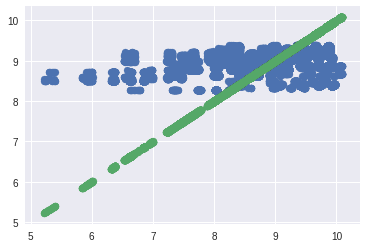

In [171]:
plt.scatter(x=Y2_test, y=y_pred2) #azul
plt.scatter(x=Y2_test,y=Y2_test) #verde
plt.show()
#verifica-se que há um comportamento semelhante ao do gráfico com todas as features.

In [173]:
#calcular o RMSE para o train set

(np.mean((Y2_train-regressor2.predict(X2_train)) ** 2))**0.5

#Esta é a importante - erro do método
np.mean(abs(Y2_test-y_pred2)/Y2_test)

0.05061345923285292

In [0]:
# Calcular o erro absoluto
errors = abs(y_pred2 - Y2_test)

In [175]:
# mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.44


In [176]:
display('RMSE: '+ str(np.sqrt(metrics.mean_squared_error(y_pred2, Y2_test))))

'RMSE: 0.6008389622406273'

In [0]:
# mean absolute percentage error (MAPE)
mape = 100 * (errors / Y2_test)

In [178]:
# Calcular e display da accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.94 %.


Text(0, 0.5, 'residual')

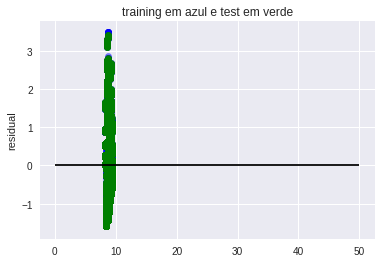

In [179]:
#visualizar os erros dos dados. Se os calculos estiverem bem feitos os dados estarão espalhados à volta
#da linha do zero. Neste gráfico verifica-se que os dados estao à volta da linha de zero.
plt.scatter(regressor2.predict(X2_train),regressor2.predict(X2_train)-Y2_train,c='b',s=40,alpha=0.5)
plt.scatter(regressor2.predict(X2_test),regressor2.predict(X2_test)-Y2_test,c='g',s=40)
plt.hlines(y=0,xmin=0,xmax=50)
plt.title('training em azul e test em verde')
plt.ylabel('residual')

### Learning Curves

In [0]:
from sklearn.model_selection import learning_curve
import numpy as np
from matplotlib import pyplot as plt

In [0]:
train_sizes = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = LinearRegression(), X = X,
                                                   y = y, train_sizes = train_sizes, cv = 10,
                                                   scoring = 'neg_median_absolute_error')

In [0]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

(0, 1.0)

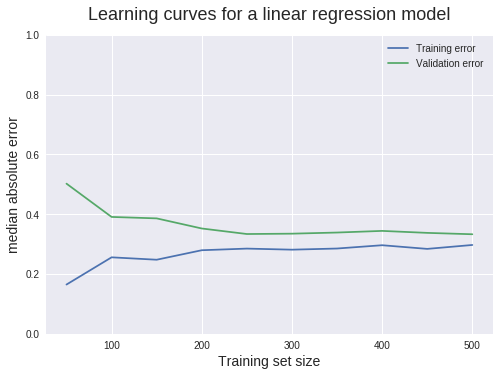

In [183]:
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('median absolute error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1.0)
#Neste gráfico verifica-se que o erro de training começa abaixo de 0.2 e aumenta pouco, para +/- 0.3 e assim continua constante.
#O erro de validação e de train comportam-se como espelho um do outro mas, à medida que o tamanho do train set aumenta, o valor de erro de ambos 
#mantem-se constante

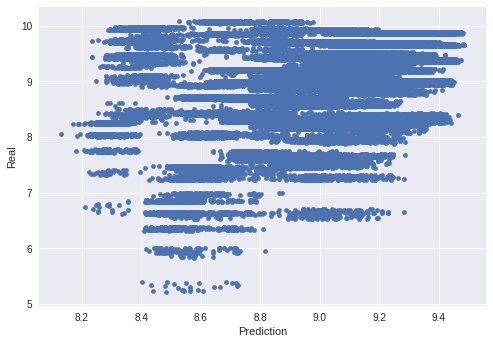

In [184]:
Values = pd.DataFrame({'Prediction':y_pred, 'Real':Y_test})
Values = Values.sort_values(['Prediction'], ascending=[True])
Values.plot('Prediction', 'Real', kind='scatter')

Text(0.5, 1.0, 'Prices vs Predicted Prices')

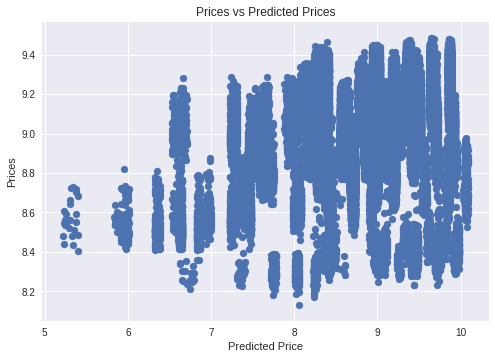

In [185]:
plt.scatter(Y_test, y_pred)
plt.xlabel("Predicted Price")
plt.ylabel("Prices")
plt.title("Prices vs Predicted Prices")

Nestes dois últimos gráficos os dados estão espalhados mas tentam agregar-se na zona da linha do zero. Podemos concluir que este este método não é o melhor para o nosso dataset e que o nosso dataset tem muitos valores, fazendo com que os gráficos parecem nuvens densas. Na realidade são muitos pontos concentrados num local do gráfico.